In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



In [2]:
file_path = "EastWestAirlines.xlsx"


df = pd.read_excel(file_path, sheet_name="data")

# Display first few rows
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()


df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [4]:
df_clean = df.drop(columns=["ID#"])


print("Missing values per column:\n", df_clean.isnull().sum())

# Detect outliers using IQR method
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of outliers per column:\n", outliers)

Missing values per column:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Number of outliers per column:
 Balance              266
Qual_miles           226
cc1_miles              0
cc2_miles             43
cc3_miles             18
Bonus_miles          280
Bonus_trans           63
Flight_miles_12mo    569
Flight_trans_12      565
Days_since_enroll      0
Award?                 0
dtype: int64


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)


df_scaled = pd.DataFrame(scaled_data, columns=df_clean.columns)
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


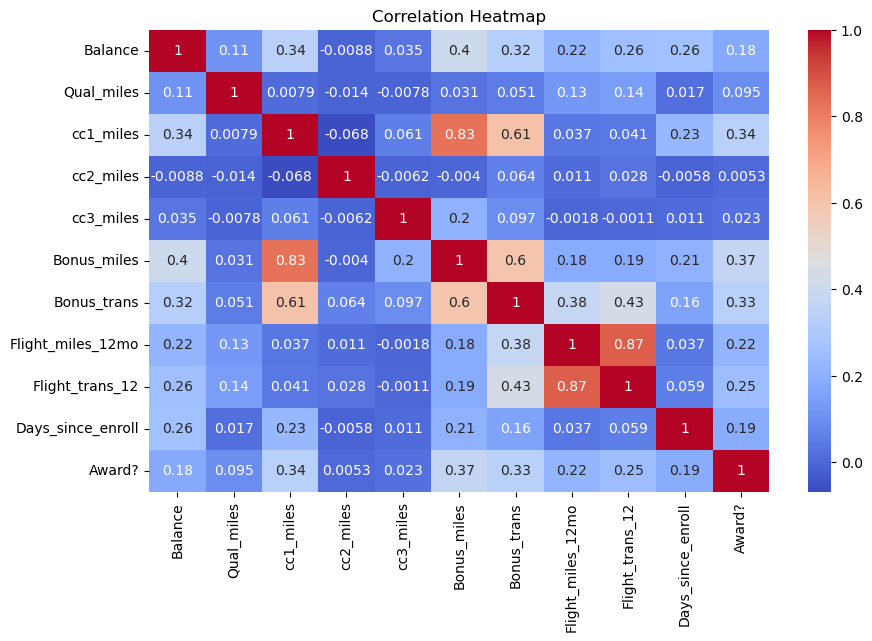

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

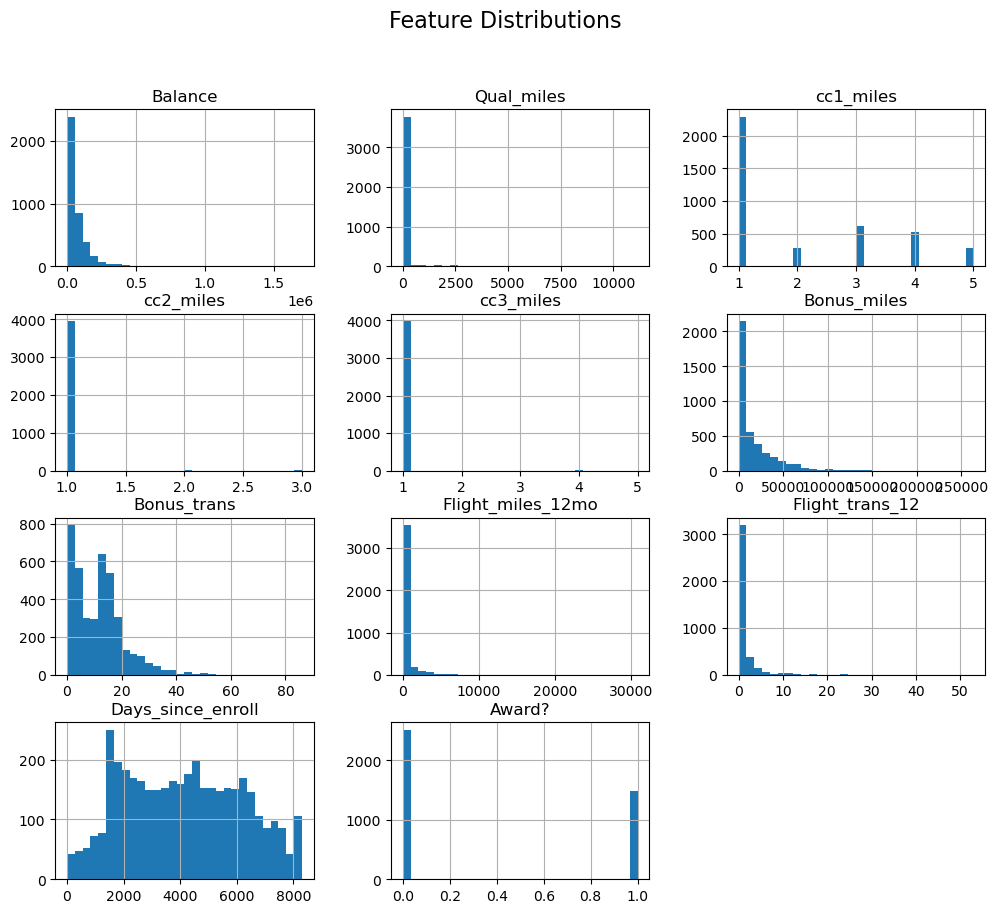

In [7]:
df_clean.hist(figsize=(12,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

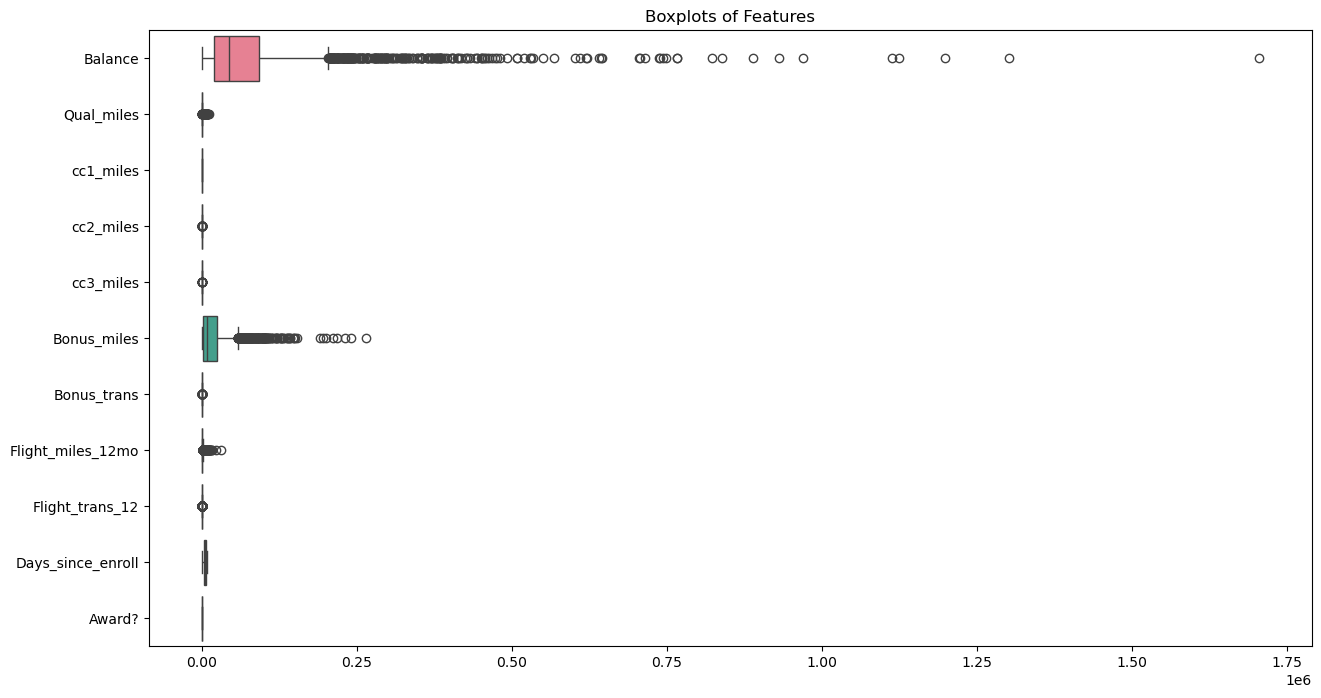

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_clean, orient="h")
plt.title("Boxplots of Features")
plt.show()

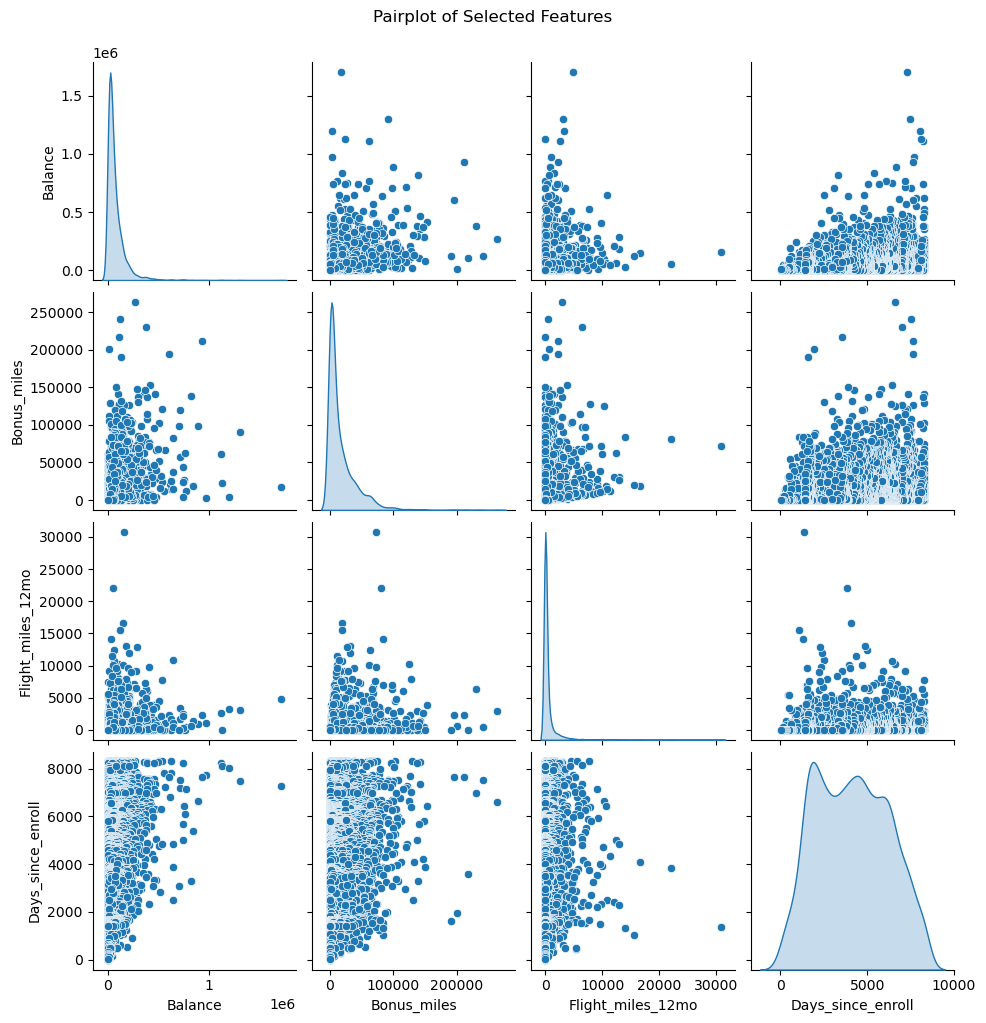

In [9]:
sample_cols = ["Balance", "Bonus_miles", "Flight_miles_12mo", "Days_since_enroll"]
sns.pairplot(df_clean[sample_cols], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

In [10]:
df_clean = df.drop(columns=["ID#"])

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_clean.columns)
df_scaled.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


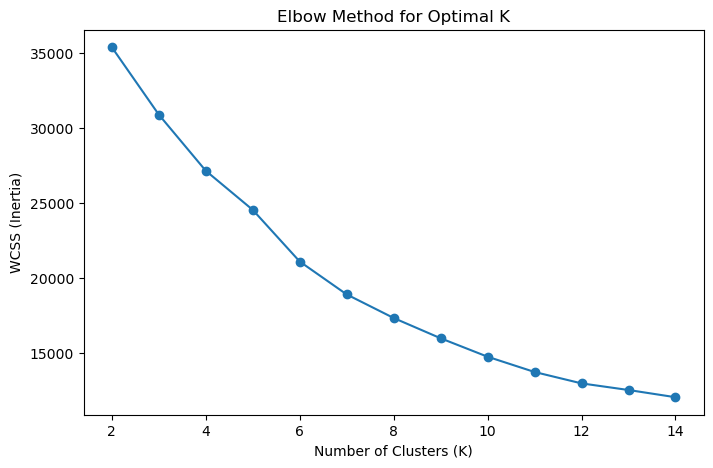

In [12]:
wcss = []
K_range = range(2, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

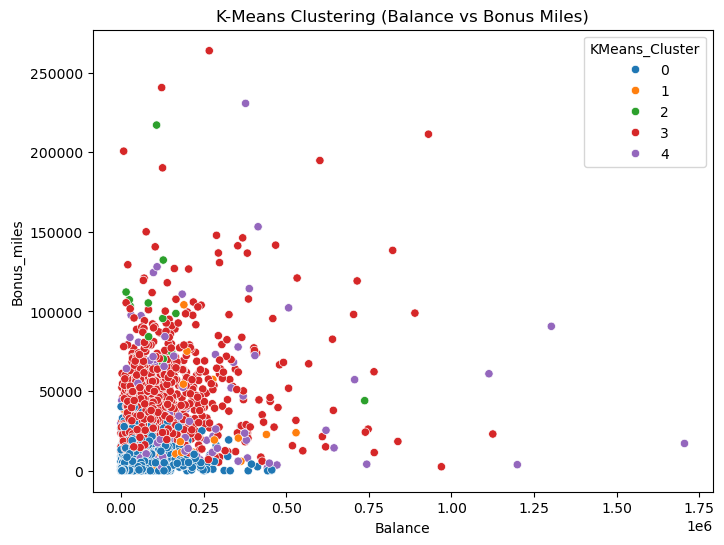

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_clean["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"],
                hue=df_clean["KMeans_Cluster"], palette="tab10")
plt.title("K-Means Clustering (Balance vs Bonus Miles)")
plt.show()

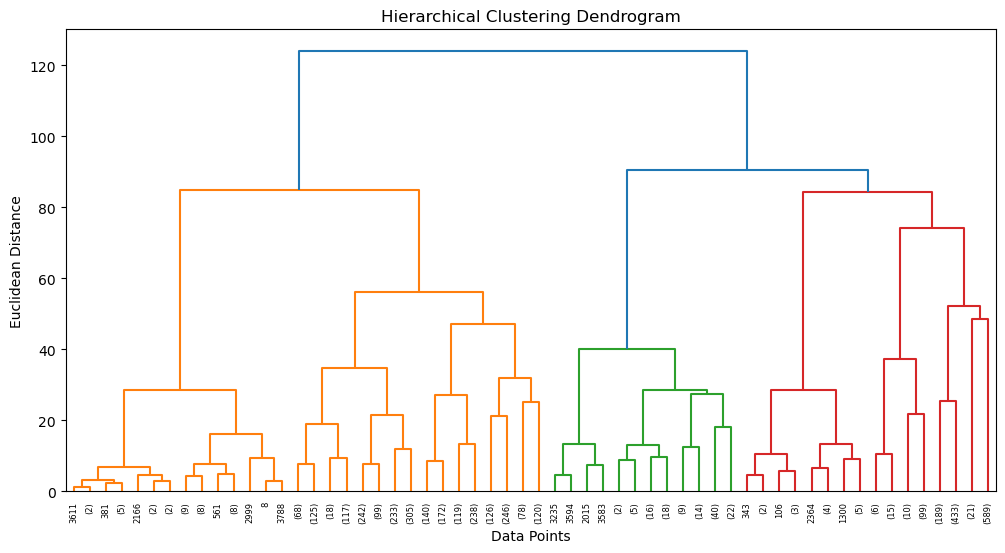

In [14]:
linked = linkage(df_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [15]:
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")


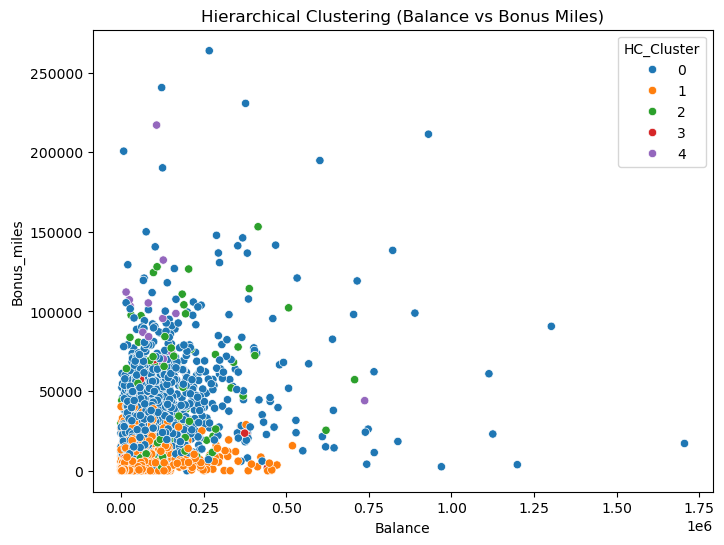

In [16]:
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
df_clean["HC_Cluster"] = hc.fit_predict(df_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"],
                hue=df_clean["HC_Cluster"], palette="tab10")
plt.title("Hierarchical Clustering (Balance vs Bonus Miles)")
plt.show()

DBSCAN_Cluster
 0    2436
 1    1288
-1     237
 2      15
 3       9
 4       7
 5       7
Name: count, dtype: int64


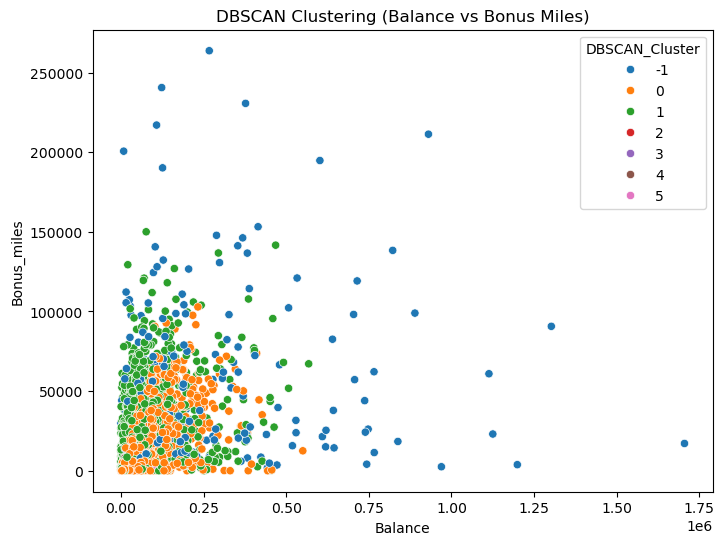

In [17]:
dbscan = DBSCAN(eps=1.8, min_samples=5)
df_clean["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

print(df_clean["DBSCAN_Cluster"].value_counts())

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"],
                hue=df_clean["DBSCAN_Cluster"], palette="tab10")
plt.title("DBSCAN Clustering (Balance vs Bonus Miles)")
plt.show()

In [18]:
print("KMeans Cluster Counts:\n", df_clean["KMeans_Cluster"].value_counts(), "\n")
print("Hierarchical Cluster Counts:\n", df_clean["HC_Cluster"].value_counts(), "\n")
print("DBSCAN Cluster Counts:\n", df_clean["DBSCAN_Cluster"].value_counts(), "\n")


KMeans Cluster Counts:
 KMeans_Cluster
0    2532
3    1244
4     147
1      61
2      15
Name: count, dtype: int64 

Hierarchical Cluster Counts:
 HC_Cluster
1    2446
0    1362
2     130
3      43
4      18
Name: count, dtype: int64 

DBSCAN Cluster Counts:
 DBSCAN_Cluster
 0    2436
 1    1288
-1     237
 2      15
 3       9
 4       7
 5       7
Name: count, dtype: int64 



In [19]:

from sklearn.metrics import silhouette_score
kmeans_sil = silhouette_score(df_scaled, df_clean["KMeans_Cluster"])


hc_sil = silhouette_score(df_scaled, df_clean["HC_Cluster"])

dbscan_labels = df_clean["DBSCAN_Cluster"]
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_sil = silhouette_score(df_scaled, dbscan_labels)
else:
    dbscan_sil = "Not Applicable (noise or single cluster)"

print("Silhouette Scores:")
print(f"KMeans: {kmeans_sil}")
print(f"Hierarchical: {hc_sil}")
print(f"DBSCAN: {dbscan_sil}")


Silhouette Scores:
KMeans: 0.3188772727741292
Hierarchical: 0.3098805307874414
DBSCAN: Not Applicable (noise or single cluster)


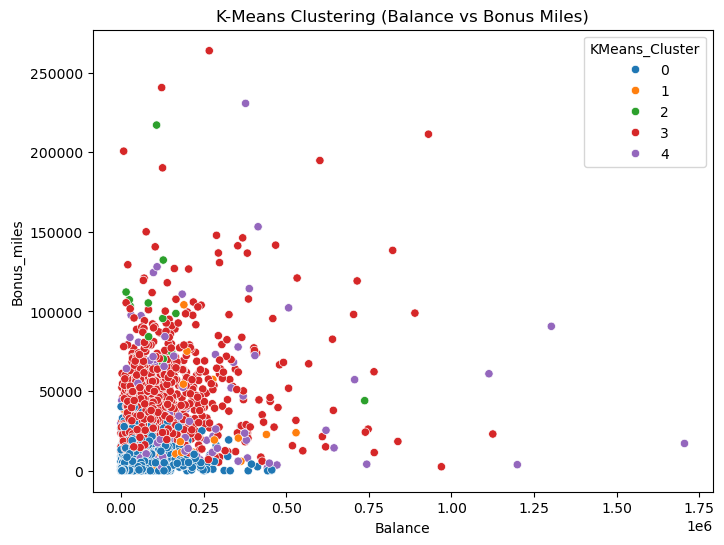

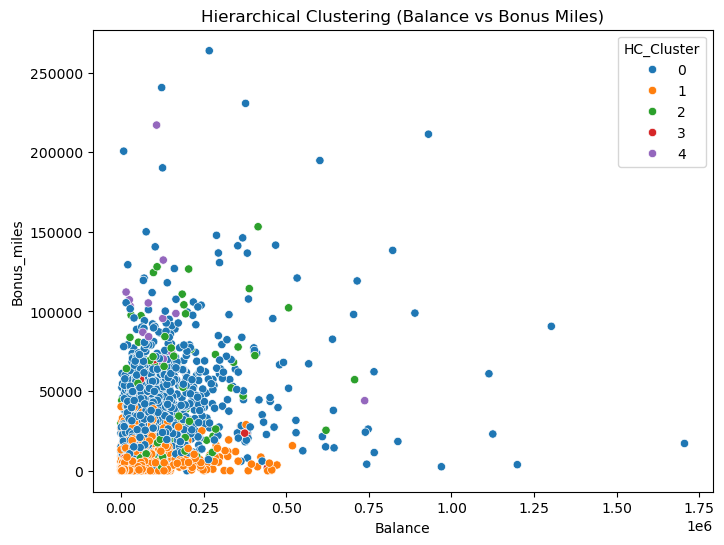

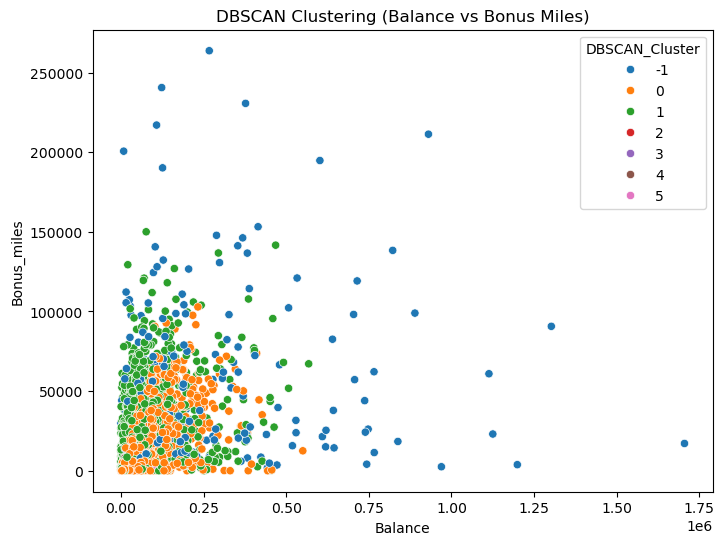

In [20]:


plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"],
                hue=df_clean["KMeans_Cluster"], palette="tab10")
plt.title("K-Means Clustering (Balance vs Bonus Miles)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"],
                hue=df_clean["HC_Cluster"], palette="tab10")
plt.title("Hierarchical Clustering (Balance vs Bonus Miles)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_clean["Balance"], y=df_clean["Bonus_miles"],
                hue=df_clean["DBSCAN_Cluster"], palette="tab10")
plt.title("DBSCAN Clustering (Balance vs Bonus Miles)")
plt.show()


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_pca["KMeans"] = df_clean["KMeans_Cluster"]
df_pca["HC"] = df_clean["HC_Cluster"]
df_pca["DBSCAN"] = df_clean["DBSCAN_Cluster"]


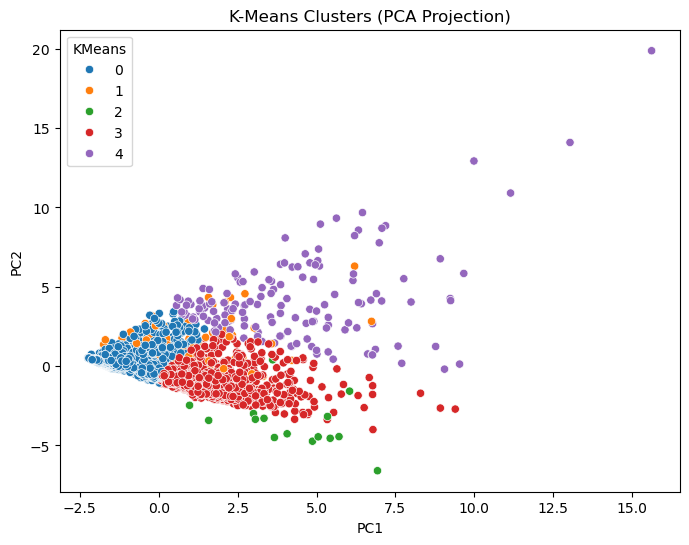

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="KMeans", palette="tab10")
plt.title("K-Means Clusters (PCA Projection)")
plt.show()

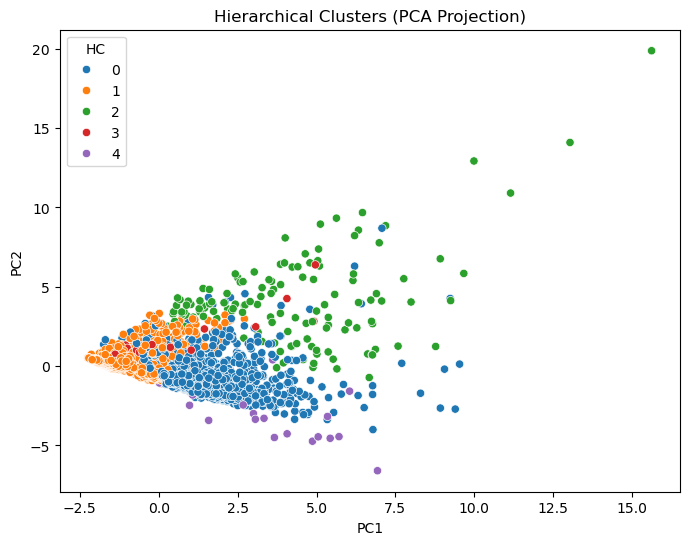

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="HC", palette="tab10")
plt.title("Hierarchical Clusters (PCA Projection)")
plt.show()

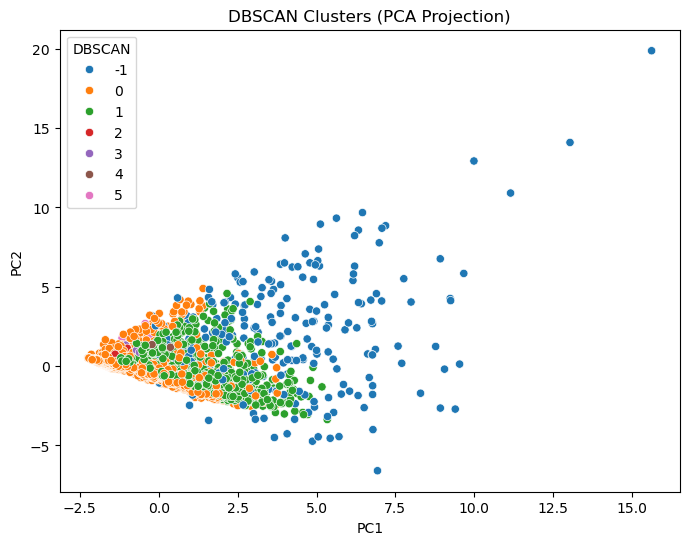

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="DBSCAN", palette="tab10")
plt.title("DBSCAN Clusters (PCA Projection)")
plt.show()

In [25]:

from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(df_scaled, df_clean["KMeans_Cluster"])
print(f"KMeans Silhouette Score: {kmeans_silhouette:.4f}")

KMeans Silhouette Score: 0.3189


In [26]:
hc_silhouette = silhouette_score(df_scaled, df_clean["HC_Cluster"])
print(f"Hierarchical Silhouette Score: {hc_silhouette:.4f}")

Hierarchical Silhouette Score: 0.3099


In [27]:
dbscan_labels = df_clean["DBSCAN_Cluster"]

if len(set(dbscan_labels)) > 1 and (len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
else:
    dbscan_silhouette = "Not Applicable (all noise or single cluster)"

print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: 0.255863647852707


In [29]:
import pandas as pd

X = df.select_dtypes(include=[float, int]).values


In [33]:
print(df.columns)


Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


In [34]:
X = df.select_dtypes(include=[float, int]).values



In [35]:
features = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
            'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
            'Flight_trans_12', 'Days_since_enroll']

X = df[features].values


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features])


In [37]:
Z = linkage(X, method='ward')


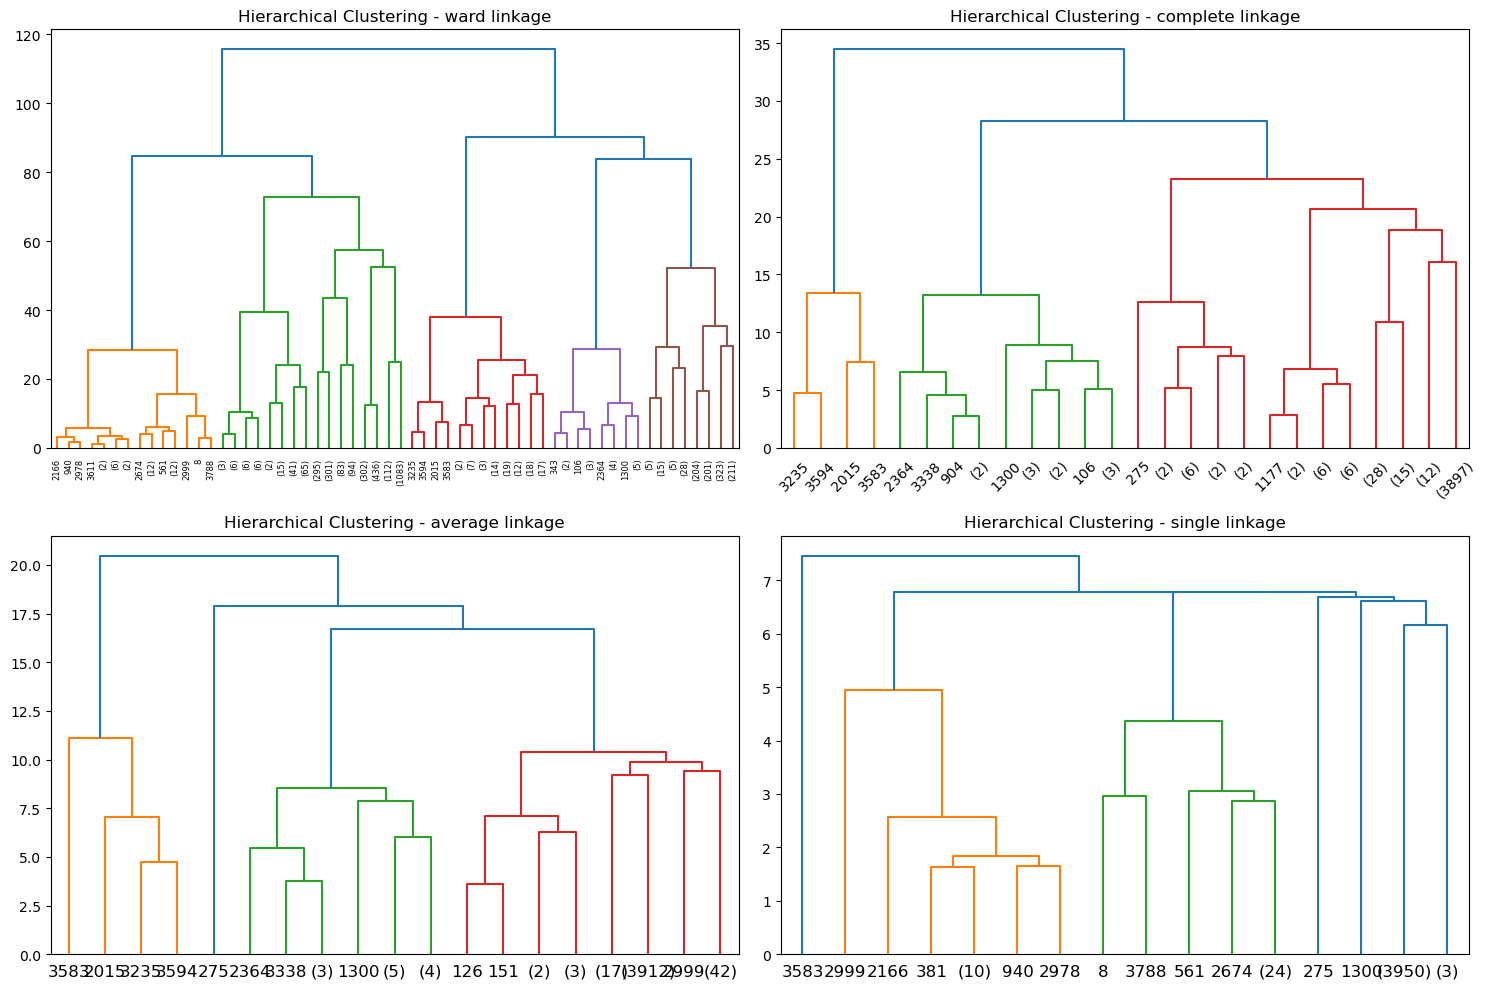

In [38]:
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    Z = linkage(X, method=method)  # X is your feature matrix
    plt.subplot(2, 2, i)
    dendrogram(Z, truncate_mode="level", p=5)
    plt.title(f"Hierarchical Clustering - {method} linkage")

plt.tight_layout()
plt.show()

In [39]:
from sklearn.neighbors import NearestNeighbors



In [40]:
neighbors = NearestNeighbors(n_neighbors=5)  
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

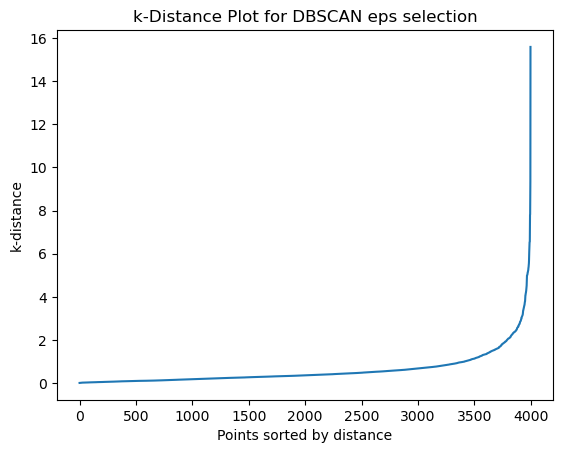

In [41]:
distances = np.sort(distances[:,4]) 
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("k-Distance Plot for DBSCAN eps selection")
plt.show()

Estimated number of clusters: 13


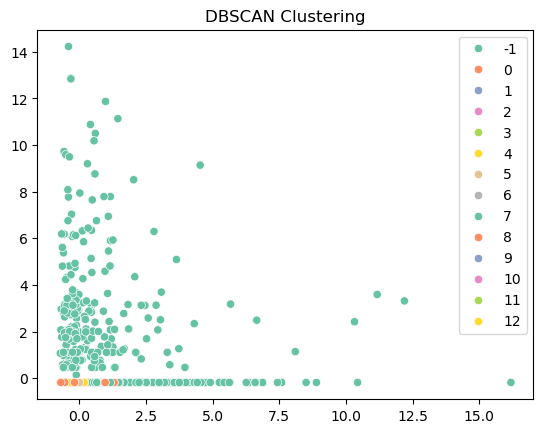

In [42]:
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

labels = db.labels_  
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Estimated number of clusters: {n_clusters}")


sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette="Set2", legend="full")
plt.title("DBSCAN Clustering")
plt.show()